# Klassifikation (für PET)
**Feature:**
- '∆Hm in Jg-1',
-  'TStart in °C'
-  'TEnd in °C'
-  'Tm in °C'
-  (Hm)
-  'Modality'

**Target:** 'Aging Level'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [3]:
import pandas as pd

In [4]:
file_path_data = "data/051_Data_2st_Heating_PET.csv"

df_data = pd.read_csv(file_path_data)
df_data

,Sample Name,Name of Original DSC Measurement,Mass in mg,∆Hm in Jg-1,Segment,Polymer,TStart in °C,TEnd in °C,Tm in °C,Tm,Hm,Modality,Tail,Shoulder,Aging Level
0,0-PET-1_1,0-PET-1,1.44,28.88,2nd Heating,PET,200.00,253.77,230.2,230,2.99577,bimodal,left,undefined,Pristine LDPE and PET
1,0-PET-1_2,0-PET-2,1.35,30.34,2nd Heating,PET,200.79,256.30,230.5,230,2.78461,bimodal,left,undefined,Pristine LDPE and PET
2,0-PET-1_3,0-PET-3,1.39,30.00,2nd Heating,PET,200.00,254.25,229.8,230,3.05761,bimodal,left,undefined,Pristine LDPE and PET
3,0-PET-1_4,0-PET-4,1.28,29.29,2nd Heating,PET,200.00,254.59,230.2,230,2.95315,bimodal,left,undefined,Pristine LDPE and PET
4,0-PET-1_5,0-PET-5,1.34,31.94,2nd Heating,PET,200.00,255.31,229.7,230,2.76109,bimodal,left,undefined,Pristine LDPE and PET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,3-EBT-PET-4_1,eb-PET-62,1.18,36.62,2nd Heating,PET,205.46,254.29,239.9,240,6.79035,wide,left,undefined,Third EBT
134,3-EBT-PET-4_2,eb-PET-63,1.27,36.95,2nd Heating,PET,201.99,251.99,239.9,240,6.08880,wide,left,undefined,Third EBT
135,3-EBT-PET-4_3,eb-PET-64,1.30,36.87,2nd Heating,PET,202.37,251.33,240.0,240,6.31048,wide,left,undefined,Third EBT
136,3-EBT-PET-4_4,eb-PET-65,1.21,36.30,2nd Heating,PET,198.86,256.10,239.3,239,6.60616,wide,left,undefined,Third EBT


In [5]:
for v in df_data["Aging Level"].unique():
    print(v)

Pristine LDPE and PET
First UV-cycle (4 weeks irradiation)
Second UV-cycle (8 weeks irradiation)
Third UV-cycle (12 weks irradiation)
First EBT
Second EBT
Third EBT


In [6]:
df_data.columns

Index(['Sample Name', 'Name of Original DSC Measurement', 'Mass in mg',
       '∆Hm in Jg-1', 'Segment', 'Polymer', 'TStart in °C', 'TEnd in °C',
       'Tm in °C', 'Tm', 'Hm', 'Modality', 'Tail', 'Shoulder', 'Aging Level'],
      dtype='object')

In [7]:
# Häufigkeiten der Werte für jede Spalte berechnen und einzeln anzeigen
print(f"{df_data['Modality'].value_counts()}\n")
print(f"{df_data['Tail'].value_counts()}\n")
print(f"{df_data['Shoulder'].value_counts()}")

Modality
bimodal    119
wide        17
quasi        2
Name: count, dtype: int64

Tail
left    138
Name: count, dtype: int64

Shoulder
undefined    138
Name: count, dtype: int64


## A) Random Forest Classifier (without Hm)

In [9]:
# Datenvorbereitung

# ohne 'Sample Name', 'Name of Original DSC Measurement', 'Mass in mg'
features = [
    '∆Hm in Jg-1', 'TStart in °C', 'TEnd in °C', 'Tm in °C',
    'Modality'
]
target = 'Aging Level'

# Merkmalsauswahl und Zielspalte
X = df_data[features]
y = df_data[target]

In [10]:
# Kategorische Variablen in numerische Form umwandeln
X = pd.get_dummies(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
# Random Forest Modell
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Vorhersage
y_pred = rf_model.predict(X_test)

# Bewertung
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.5714285714285714
                                       precision    recall  f1-score   support

                            First EBT       0.18      0.67      0.29         3
 First UV-cycle (4 weeks irradiation)       1.00      1.00      1.00         5
                Pristine LDPE and PET       1.00      0.75      0.86         4
                           Second EBT       0.00      0.00      0.00         6
Second UV-cycle (8 weeks irradiation)       0.67      0.67      0.67         3
                            Third EBT       1.00      1.00      1.00         1
 Third UV-cycle (12 weks irradiation)       0.75      0.50      0.60         6

                             accuracy                           0.57        28
                            macro avg       0.66      0.65      0.63        28
                         weighted avg       0.61      0.57      0.57        28



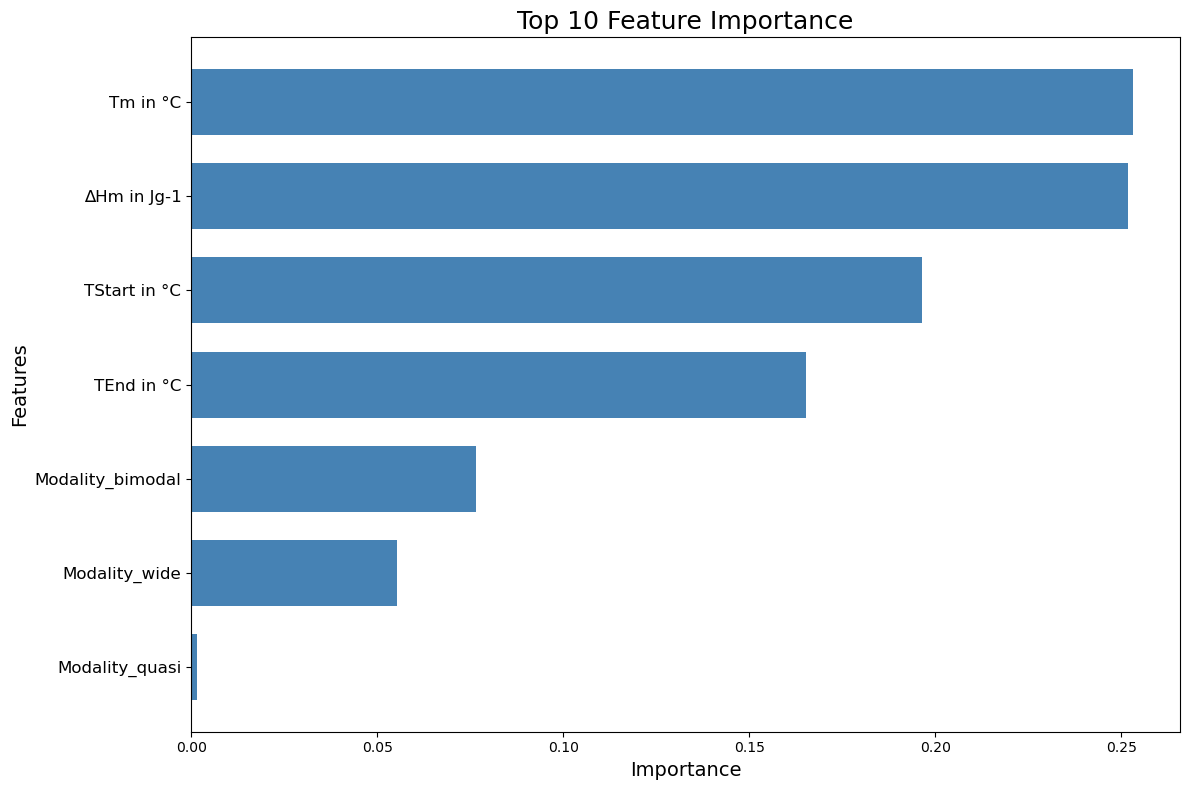

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Feature-Wichtigkeiten extrahieren
feature_importance = rf_model.feature_importances_
features = X.columns  # Nach get_dummies

# Sortieren und Visualisieren
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Top 10 Features auswählen
top_10_features = importance_df.head(10)

plt.figure(figsize=(12, 8))  # Breite und Höhe anpassen
plt.barh(top_10_features['Feature'], top_10_features['Importance'], height=0.7, color="steelblue")
plt.title('Top 10 Feature Importance', fontsize=18)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.yticks(fontsize=12)  # Lesbare Schriftgröße
plt.gca().invert_yaxis()  # Sortierung von oben nach unten
plt.tight_layout()
plt.show()

In [14]:
# Testen mit verschiedenen random_states
random_states = [0, 1, 2, 3, 10, 20, 42, 70, 100, 1000]
results = {}

for state in random_states:
    # Train-Test-Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=state)
    
    # Random Forest Modell
    rf_model = RandomForestClassifier(random_state=state)
    rf_model.fit(X_train, y_train)
    
    # Vorhersage
    y_pred = rf_model.predict(X_test)
    
    # Bewertung
    accuracy = accuracy_score(y_test, y_pred)
    results[state] = accuracy

results

{0: 0.6428571428571429,
 1: 0.6428571428571429,
 2: 0.6071428571428571,
 3: 0.7142857142857143,
 10: 0.5,
 20: 0.6428571428571429,
 42: 0.5714285714285714,
 70: 0.6428571428571429,
 100: 0.5714285714285714,
 1000: 0.5357142857142857}

## B) Random Forest Classifier (with Hm)

In [16]:
# Datenvorbereitung
# ohne 'Sample Name', 'Name of Original DSC Measurement', 'Mass in mg'
features = [
    '∆Hm in Jg-1', 'TStart in °C', 'TEnd in °C', 'Tm in °C',
    'Hm',
    'Modality'
]
target = 'Aging Level'

# Merkmalsauswahl und Zielspalte
X = df_data[features]
y = df_data[target]


# Kategorische Variablen in numerische Form umwandeln
X = pd.get_dummies(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Random Forest Modell
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Vorhersage
y_pred = rf_model.predict(X_test)

# Bewertung
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.8571428571428571
                                       precision    recall  f1-score   support

                            First EBT       0.60      1.00      0.75         3
 First UV-cycle (4 weeks irradiation)       1.00      0.80      0.89         5
                Pristine LDPE and PET       1.00      1.00      1.00         4
                           Second EBT       0.83      0.83      0.83         6
Second UV-cycle (8 weeks irradiation)       0.75      1.00      0.86         3
                            Third EBT       1.00      1.00      1.00         1
 Third UV-cycle (12 weks irradiation)       1.00      0.67      0.80         6

                             accuracy                           0.86        28
                            macro avg       0.88      0.90      0.88        28
                         weighted avg       0.89      0.86      0.86        28



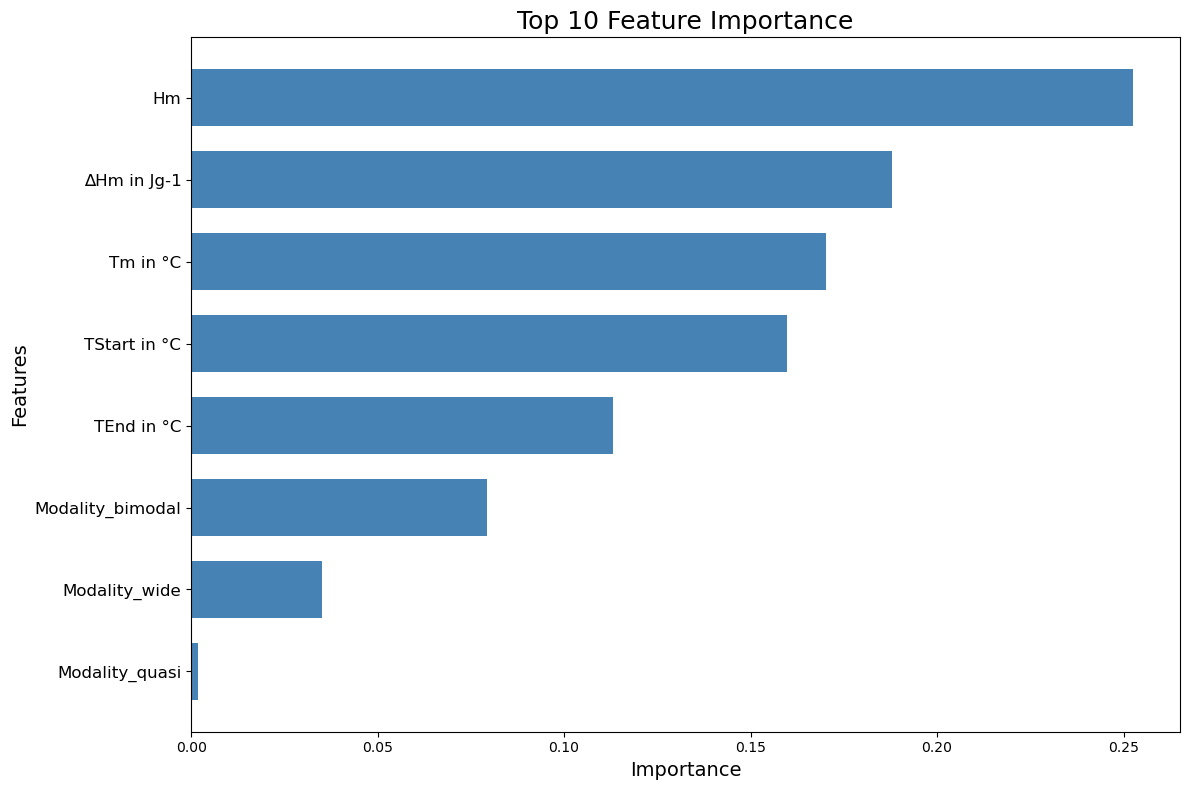

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Feature-Wichtigkeiten extrahieren
feature_importance = rf_model.feature_importances_
features = X.columns  # Nach get_dummies

# Sortieren und Visualisieren
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Top 10 Features auswählen
top_10_features = importance_df.head(10)

plt.figure(figsize=(12, 8))  # Breite und Höhe anpassen
plt.barh(top_10_features['Feature'], top_10_features['Importance'], height=0.7, color="steelblue")
plt.title('Top 10 Feature Importance', fontsize=18)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.yticks(fontsize=12)  # Lesbare Schriftgröße
plt.gca().invert_yaxis()  # Sortierung von oben nach unten
plt.tight_layout()
plt.show()

In [18]:
# Testen mit verschiedenen random_states
random_states = [0, 1, 2, 3, 10, 20, 42, 70, 100, 1000]
results = {}

for state in random_states:
    # Train-Test-Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=state)
    
    # Random Forest Modell
    rf_model = RandomForestClassifier(random_state=state)
    rf_model.fit(X_train, y_train)
    
    # Vorhersage
    y_pred = rf_model.predict(X_test)
    
    # Bewertung
    accuracy = accuracy_score(y_test, y_pred)
    results[state] = accuracy

results

{0: 0.8214285714285714,
 1: 0.8928571428571429,
 2: 0.8571428571428571,
 3: 0.8571428571428571,
 10: 0.8571428571428571,
 20: 0.9285714285714286,
 42: 0.8571428571428571,
 70: 0.9642857142857143,
 100: 0.9285714285714286,
 1000: 0.8214285714285714}

In [19]:
mean_value = sum(results.values()) / len(results)
print(f"Ø Genauigkeit: {mean_value}")

Ø Genauigkeit: 0.8785714285714284
